# Import all kind of stuff

In [76]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap, colors

from theory.models.bcs import Delta_meV_of_T
from theory.models.bcs import N_of_E
from theory.models.bcs import f_of_E
from theory.models.bcs import get_I_nA as get_I_nA_bcs

from theory.models.tg import get_I_pat_nA as get_I_nA_tg

from theory.models.constants import k_B_meV, G_0_muS, e, h

# Set plot fontsizes

In [4]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [5]:
textwidth = 4.25279  # in
textheight = 6.85173

print(
    " 1.0",
    textwidth,
    textheight,
    "\n",
    "0.9",
    0.9 * textwidth,
    0.9 * textheight,
    "\n",
    "0.8",
    0.8 * textwidth,
    0.8 * textheight,
    "\n",
    "0.7",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.6",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.5",
    0.5 * textwidth,
    0.5 * textheight,
    "\n",
    "0.4",
    0.4 * textwidth,
    0.4 * textheight,
    "\n",
)

 1.0 4.25279 6.85173 
 0.9 3.8275110000000003 6.166557 
 0.8 3.402232 5.481384 
 0.7 2.976953 4.796211 
 0.6 2.976953 4.796211 
 0.5 2.126395 3.425865 
 0.4 1.701116 2.740692 



# Josephson $I(V)$

In [9]:
Delta_meV = 0.18
Gamma_meV = 0.0001
T_K = 0.0
V = np.linspace(-0.05, 2.8, 511)
V_mV = V * Delta_meV
tau = 0.001
I_C = np.pi / 2
I_J = np.sin(2 * np.pi / 18) * I_C

In [6]:
360 / 18

20.0

In [7]:
I_bcs = get_I_nA_bcs(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    Gamma_meV=Gamma_meV,
) / (Delta_meV * G_0_muS * tau)
V_min = V[np.argmin(np.abs(V))]
I = np.where(V == V_min, I_J, I_bcs)

In [8]:
np.min(I), np.max(I)

(np.float64(-1.556223469791636e-08), np.float64(2.477424001003417))

https://en.wikipedia.org/wiki/Josephson_effect#/media/File:I-V_characteristics_of_Josephson_Junction.JPG

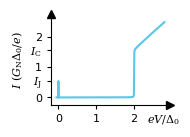

In [9]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.7, 1.2),
)
ax.plot(
    V,
    I,
    color=colors(0),
)

ax.set_ylim([-0.25, 2.75])

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

ax_trans = ax.get_xaxis_transform()
# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.set_xticks([0, 1, 2])
# ax.set_yticks([0, 1])
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.set_yticks(
    [0, 1, 2, I_J, I_C], labels=["0", "1", "2", "$I_\\mathrm{J}$", "$I_\\mathrm{C}$"]
)
ax.text(x_lim[1] - 0.6, -0.75, "$eV/\\Delta_0$", ha="left", va="center", fontsize=8)
ax.set_ylabel("$I\\ (G_\\mathrm{N}\\Delta_0/e)$")


fig.tight_layout(pad=0.1)
fig.savefig("josephson-iv.pgf")
fig.savefig("josephson-iv.pdf")

# Josephson $I(\phi)$

In [10]:
phi = np.linspace(0, 2 * np.pi, 361)
I_J_phi = np.sin(phi)

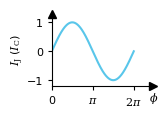

In [11]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.5, 1),
)
ax.plot(
    phi,
    I_J_phi,
    color=colors(0),
)

ax.set_ylim([-1.2, 1.3])
ax.set_xlim([0, 2 * np.pi + 1.5])
ax.set_yticks([-1, 0, 1])
ax.set_xticks([0, np.pi, 2 * np.pi], labels=["0", "$\\pi$", "$2\\pi$"])

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

ax_trans = ax.get_xaxis_transform()
# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
# ax.set_yticks([0, 1])
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(x_lim[1] - 0.35, -1.6, "$\\phi$", ha="left", va="center", fontsize=8)
ax.set_ylabel("$I_\\mathrm{J}$ ($I_\\mathrm{C}$)", labelpad=0)


fig.tight_layout(pad=0.1)
fig.savefig("josephson-iphi.pgf")
fig.savefig("josephson-iphi.pdf")

# Josephson $I(t)$

In [ ]:
from theory.models.constants import e, h

Delta_meV = 0.180
t_ns = np.linspace(0, 115, 1001)  # ps
t_ns = np.linspace(0, 30, 1001)  # ps
V_mV = np.array([Delta_meV, 1.1 * Delta_meV, 1.2 * Delta_meV])
V_mV = np.array([Delta_meV])
phi_0 = 0.0
I_C = np.pi / 2

nu_0_GHz = 2 * e / h * V_mV * 1e-3 * 1e-12

phi = np.zeros((t_ns.shape[0], V_mV.shape[0]))
for i, v_mV in enumerate(V_mV):
    phi[:, i] = phi_0 + 2 * np.pi * nu_0_GHz[i] * t_ns

I_J = I_C * np.sin(phi)

In [68]:
2 * e / h * V_mV * 1e-3 * 1e-9

array([87.04761272])

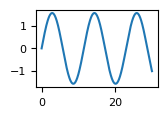

In [66]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.5, 1),
)
for i, v_mV in enumerate(V_mV):
    plt.plot(t_ns, I_J[:, i])

fig.tight_layout(pad=0.1)
fig.savefig("josephson-it.pgf")
fig.savefig("josephson-it.pdf")

# $I_C(T)$ Ambegaokar-Baratoff

In [12]:
Delta_0_meV = 0.18
T_C_K = Delta_0_meV / (1.764 * k_B_meV)
T_K = np.linspace(0, T_C_K, 101)
Delta_T_meV = np.zeros_like(T_K)
for i, T in enumerate(T_K):
    Delta_T_meV[i] = Delta_meV_of_T(Delta_meV=Delta_0_meV, T_K=T)
I_C_nA = np.pi / 2 * Delta_0_meV
I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA
I_C_lin = (T_C_K - T_K) * 635e-3 / I_C_nA
I_C_lin[I_C_lin > 1.0] = np.nan

/var/folders/kc/8fnzl3f94vxgl8w4wm3wfvk80000gn/T/ipykernel_14986/3616836601.py:8: RuntimeWarning: divide by zero encountered in divide
  I_C_AB = Delta_T_meV * np.pi / (2) * np.tanh(Delta_T_meV / (2 * k_B_meV * T_K)) / I_C_nA


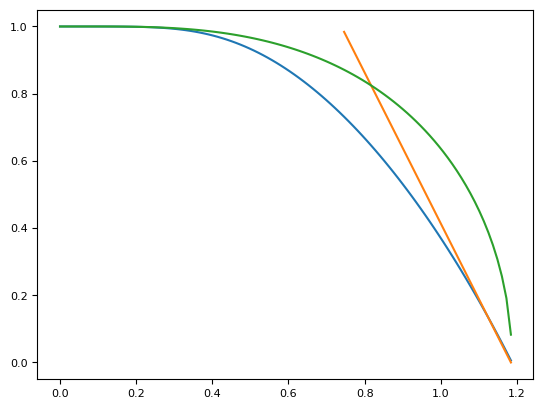

In [13]:
plt.plot(T_K, I_C_AB)
plt.plot(T_K, I_C_lin)
plt.plot(T_K, Delta_T_meV / Delta_0_meV)

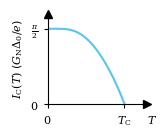

In [15]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.5, 1.2),
)
# Plot the simplified gap curve
ax.plot(T_K / T_C_K, I_C_AB, color=colors(0))
color = "k"  # colors(2)

ax.set_xlim(0, 1.3)
ax.set_ylim(0, 1.2)

# Remove frame
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

ax_trans = ax.get_xaxis_transform()
# Draw arrow heads
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)

# Simplify ticks
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

# Move axis labels near arrow tips
ax.text(x_lim[1], -0.2, "$T$", ha="left", va="center", fontsize=8)
ax.set_ylabel("$I_\\mathrm{C}(T)$ ($G_\\mathrm{N}\\Delta_0/e$)")
# ax.set_xlabel("$T/T_\\mathrm{C}$")
ax.set_yticks([0, 1], labels=["$0$", "$\\frac{\\pi}{2}$"])
ax.set_xticks([0, 1], labels=["$0$", "$T_\\mathrm{C}$"])


fig.tight_layout(pad=0.1)
fig.savefig("I_C-suppression.pgf")
fig.savefig("I_C-suppression.pdf")

# Shapiro Stufen & PAT I(V)

In [78]:
# generate data
from theory.models.bcs import get_I_nA as get_I_nA_bcs
from theory.models.tg import get_I_pat_nA as get_I_nA_tg

Delta_meV = 0.180
V_mV = np.linspace(0, 2.5, 601) * Delta_meV  # mV
A_mV = np.array([0, 0.1, 0.2]) * Delta_meV  # mV
tau = 1
T_K = 0.0
Gamma_meV = 0.0
nu_GHz = 5.0

I_BCS = np.full((A_mV.shape[0], V_mV.shape[0]), np.nan)

I_BCS = get_I_nA_bcs(
    V_mV=V_mV,
    tau=tau,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    Gamma_meV=Gamma_meV,
)
I_PAT = get_I_nA_tg(A_mV=A_mV, V_mV=V_mV, I_nA=I_BCS, nu_GHz=nu_GHz)

dIdV_PAT = np.gradient(I_PAT, V_mV, axis=1) / G_0_muS

I_PAT /= Delta_meV * G_0_muS

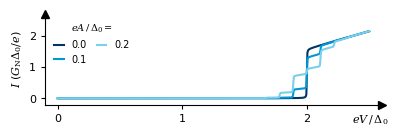

In [71]:
fig, ax = plt.subplots(figsize=(3.8, 1.2))

for i, A in enumerate(A_mV):
    # SS
    ax.plot(
        V_mV / Delta_meV,
        I_PAT[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(A_mV)),
        zorder=i,
        label=f"{A/Delta_meV:1.1f}",
    )

ax.set_xlim(-0.1, 2.6)
ax.set_ylim(-0.2, 2.7)
ax.set_yticks([0, 1, 2])
ax.set_xticks([0, 1, 2])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("$I$ ($G_\\mathrm{N}\\Delta_0 /e$)")

ax.legend(
    title="$eA\\,/\\,\\Delta_0 = $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=1.0,
)

fig.tight_layout(pad=0.1)
fig.savefig("shapiro-iv.pgf")
fig.savefig("shapiro-iv.pdf")

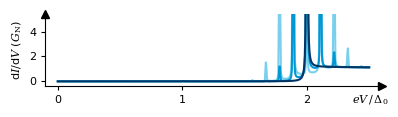

In [73]:
fig, ax = plt.subplots(figsize=(3.8, 1.0))

for i, A in enumerate(A_mV):
    ax.plot(
        V_mV / Delta_meV,
        dIdV_PAT[i, :],
        color=cmap(clim=(0.1, 0.8))(i / len(A_mV)),
        zorder=10 - i,
    )

ax.set_xlim(-0.1, 2.6)
ax.set_xticks([0, 1, 2])
ax.set_ylim(-0.4, 5.4)
ax.set_yticks([0, 2, 4])

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
ax_trans = ax.get_xaxis_transform()
ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.tick_params(
    axis="both",
    direction="out",
    length=3,
    labelsize=8,
    color="k",
    labelcolor="k",
)

ax.text(
    x_lim[1] + np.abs(x_lim[1] - x_lim[0]) / 50,
    (y_lim[0] - y_lim[1]) / 6,
    "$eV\\,/\\,\\Delta_0$",
    ha="right",
    va="top",
    fontsize=8,
)
ax.set_ylabel("d$I/$d$V$ ($G_\\mathrm{N}$)")

fig.tight_layout(pad=0.1)
fig.savefig("shapiro-didv.pgf")
fig.savefig("shapiro-didv.pdf")

In [ ]:
I = np.array([0, 0.33, 0.66, 1.0])
phi = np.linspace(-10 * np.pi, 10 * np.pi, 201)
U_phi = np.zeros((phi.shape[0], I.shape[0]))
for j, i in enumerate(I):

    U_phi[:, j] = -np.cos(phi) - i * phi

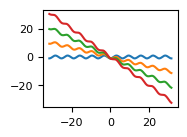

In [97]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.7, 1.2),
)

for j, i in enumerate(I):
    plt.plot(phi, U_phi[:, j])

fig.tight_layout(pad=0.1)
fig.savefig("washboard.pgf")
fig.savefig("washboard.pdf")

In [ ]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

Delta_meV = 0.18
Gamma_meV = 0.0
T_K = 0.0
tau = 1.0
I_C = np.pi / 2
I_sw = I_C / 2
I_r = I_C / 4
V = np.linspace(0, 2.5, 601)
V_mV = V * Delta_meV  # mV

I_BCS = get_I_nA_bcs(
    V_mV=V_mV,
    tau=tau,
    Delta_meV=(Delta_meV, Delta_meV),
    T_K=T_K,
    Gamma_meV=Gamma_meV,
) / (Delta_meV * G_0_muS)

I_JJ = V_mV / Delta_meV * 15
I_PD = V_mV / Delta_meV * 0.03

I_SW = np.copy(I_JJ)
I_SW[I_SW > I_sw] = I_sw - I_PD[I_SW > I_sw]
I_SW[I_BCS > I_SW] = I_BCS[I_BCS > I_SW]

I_R = np.copy(I_JJ)
I_R[I_R > I_r] = I_r + I_PD[I_SW > I_r]
I_R[I_BCS > I_R] = I_BCS[I_BCS > I_R]

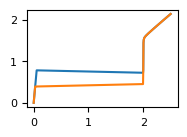

In [144]:
fig, ax = plt.subplots(
    1,
    1,
    figsize=(1.7, 1.2),
)

ax.plot(V, I_SW)
ax.plot(V, I_R)

fig.tight_layout(pad=0.1)
fig.savefig("rcsj-iv.pgf")
fig.savefig("rcsj-iv.pdf")